#### Описание проекта

 Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс.

#### Загрузка библиотек и сохранение датафреймов

Исключим данные о пользавателях с каналом organic, так как этот канал не несет для компании никаких рекламных расходов и является бесплатным.

In [41]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
visits=pd.read_csv('/datasets/visits_info_short.csv')
orders=pd.read_csv('/datasets/orders_info_short.csv')
expenses=pd.read_csv('/datasets/costs_info_short.csv')
visits=visits.rename(columns={'User Id':'user_id','Region':'region','Device':'device','Channel':'channel','Session Start':'session_start','Session End':'session_end'})
orders=orders.rename(columns={'User Id':'user_id','Event Dt':'event_dt','Revenue':'revenue'})
expenses=expenses.rename(columns={'Channel':'channel'})
display(visits.head(5))
display(orders.head(5))
display(expenses.head(5))

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


#### Преобразование данных

Посмотрим на типы данных в датафреймах. Преобразуем временные данные.

In [42]:
display(visits.info())
display(orders.info())
display(expenses.info())
visits['session_start']=pd.to_datetime(visits['session_start'])
visits['session_end']=pd.to_datetime(visits['session_end'])
orders['event_dt']=pd.to_datetime(orders['event_dt'])
expenses['dt']=pd.to_datetime(expenses['dt']).dt.date 
display(visits.info())
display(orders.info())
display(expenses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

#### Дубликаты

Убедимся что в данных нет дубликатов

In [43]:
len(visits)-len(visits.drop_duplicates())
len(orders)- len(orders.drop_duplicates())
len(expenses)- len(expenses.drop_duplicates())

0

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функция для создания пользовательских профилей

In [44]:
def get_profiles(sessions, orders, ad_costs):

    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )


    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')


    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())



    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Функция для расчета удержания

In [45]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    dimensions = ['payer'] + dimensions

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time 

#### Функция для расчета конверсии

In [46]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    if 'cohort' in dimensions: 
        dimensions = []

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time 

#### Функция для расчёта LTV и ROI

In [47]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes

        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        roi = result.div(cac['cac'], axis=0)

        roi = roi[~roi['cohort_size'].isin([np.inf])]

        roi['cohort_size'] = cohort_sizes

        roi['cac'] = cac['cac']

        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    if 'cohort' in dimensions:
        dimensions = []

    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  
        result_grouped,
        result_in_time,
        roi_grouped, 
        roi_in_time, 
    ) 

#### Функция для сглаживания фрейма

In [48]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

#### Функция для визуализации удержания

In [49]:
def plot_retention(retention, retention_history, horizon, window=7):

    plt.figure(figsize=(15, 10))

    retention = retention.drop(columns=['cohort_size', 0])
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    ax3 = plt.subplot(2, 2, 3)
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

#### Функция для визуализации конверсии

In [50]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    plt.figure(figsize=(15, 5))

    conversion = conversion.drop(columns=['cohort_size'])
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### Функция для визуализации LTV и ROI

In [51]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    cac_history = roi_history[['cac']]

    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Составление профили пользователей и определяем минимальную и максимальную даты привлечения

Устанавливаем момент анализа и горизонт анализа.

In [52]:
profiles = get_profiles(visits, orders,expenses)
display(profiles)
min_analysis_date= profiles['dt'].min()
max_analysis_date= profiles['dt'].max()
observation_date=max_analysis_date
analysis_horizon = 14
display(observation_date)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


datetime.date(2019, 10, 27)

#### Платящие пользователи по странам

Мы видим, что больше всего пользователей приходит из США, 62822. Второе и третье место делят Британия и Франция, 11325 и 11219ю На последнем месте по привлеченным пользователям идет Германия, 9682. 

При этом, если посмотреть на долю платящих пользователей, ситуация немного меняется. Все так же лидирует США, 0,101. Но на втором месте по доле платящих пользователей находится Германия, 0,055. А дальше уже идут Британия и Франция, 0,054 и 0,053.

In [53]:
profiles_region=profiles.groupby(['region']).agg({'user_id':'nunique'})
profiles_region_payer=profiles.groupby('region').agg({'payer':'mean'}).sort_values(by='payer',ascending = False)
profiles_region_payer=profiles_region_payer.merge(profiles_region,on='region')
display(profiles_region_payer)

,payer,user_id
region,,
United States,0.069019,100002
Germany,0.041119,14981
UK,0.039829,17575
France,0.037994,17450


#### Платящие пользователи по устройствам

Посмотрим с каких устройств чаще всего приходят пользователи. Больше всего пользователей приходят с iPhone, их 34433. Даее следует Android, 22163. И с небольшой разницей PC и Mac, 19463 и 18989. 

Но посмотрим на долю платящих пользователей. Лидерами уже будет MAC, 0,092. Следом чуть отстает iPhone, 0,091. Затем Android, 0,084. И уже последние PC 0,070.

In [54]:
profiles_device=profiles.groupby(['device']).agg({'user_id':'nunique'})
profiles_device_payer=profiles.groupby('device').agg({'payer':'mean'}).sort_values(by='payer',ascending = False)
profiles_device_payer=profiles_device_payer.merge(profiles_device,on='device')
display(profiles_device_payer)

,payer,user_id
device,,
Mac,0.063644,30042
iPhone,0.062079,54479
Android,0.058518,35032
PC,0.050468,30455


#### Платящие пользователи по каналу связи

Посмотрим на самые эффективные источники рекламы по привлечению пользователей. Тут явный лидер FaceBoom, 29144. TipTop, 19561. Меньше всего пользователей привлекает lambdaMediaAds, 2236.

Но посмотрим на долю платящих пользователей из этих каналов. Ситуация изменилась. FaceBoom по прежнему лидер, 0,123. Далее AdNonSense, 0,120, хотя этот канал занимал одно из последних мест по количеству привлеченных пользователей. lambdaMediaAds показал худший результат по количеству привлеченных пользователей, но вошел в тройку лидеров по доле платящих пользователей, 0,108.Самая низкая доля платящих пользователей оказалась у канала OppleCreativeMedia, 0.030. 

Отдельно стоит сказать про канал organic. из него приходит больше всего пользователей, 56439. Это значительно больше, чем из любого другого канала. но доля платяших по каналу organic самая низкая, всего 0,02. 

In [55]:
profiles_channel=profiles.groupby(['channel']).agg({'user_id':'nunique'})
profiles_channel_payer=profiles.groupby('channel').agg({'payer':'mean'}).sort_values(by='payer',ascending = False)
profiles_channel_payer=profiles_channel_payer.merge(profiles_channel,on='channel')
display(profiles_channel_payer)

,payer,user_id
channel,,
FaceBoom,0.122049,29144
AdNonSense,0.113402,3880
lambdaMediaAds,0.104700,2149
TipTop,0.096007,19561
RocketSuperAds,0.079137,4448
WahooNetBanner,0.052964,8553
YRabbit,0.038265,4312
MediaTornado,0.035747,4364
LeapBob,0.030633,8553


### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Общие траты на рекламу

Посмотрим сколько всего компания тратит на рекламу. Эта сумма составила 105497,3.

In [56]:
display(profiles['acquisition_cost'].sum())

105497.29999999999

#### Траты на рекламу по источникам

Теперь посмотрим сколько компания тратит на рекламу по источникам. Больше всего компания вкладывает к рекламу в TipTop, 54751.30. Затем идет FaceBoom, 32445.60. Меньше всего потрачено на рекламные компании в YRabbit, 944.22. На рекламу в lambdaMediaAds компания потратила 1557.60. А organic компании вообще ничего не стоит.

Снова обратим внимание на канал organic. Мы видим что для компании он бесплатный.

In [58]:
display(profiles.groupby('channel').agg({'acquisition_cost':'sum'}).sort_values(by='acquisition_cost',ascending = False))

,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


#### Визуализация динамики изменения расходов на рекламу во времени (по неделям и месяцам) по каждому источнику. 
 
 Посмотрев на график расходов на рекламу по неделям, мы можем заметить что больше всего трат на канал TipTop и эти расходы постепенно растут. Чуть меньше мы тратим на рекламу в FaceBoom, и эти расходы тоже постепенно увеличиваются. Расходы же на остальные каналы рекламы значительно ниже и они со временем сохраняются на том же уровне.
 
 Если посмотреть на график расходов на рекламу по месяцам то мы увидим все почти тоже самое. самым затратным является канал TipTop и расходы на него растут, правда наметился небольшой спад расходов после 9 месяца. следом по расходам идет FaceBoom и рост наблюдался вплоть до 8 месяца, после чего практически выровнялся. остальные каналы рекламы так же обходятся значительно дешевле и расходы на них по месяцам почти не меняются.


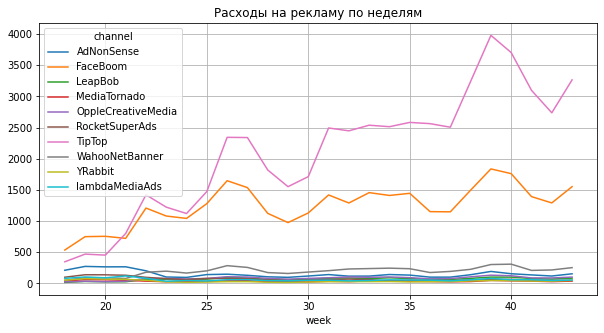

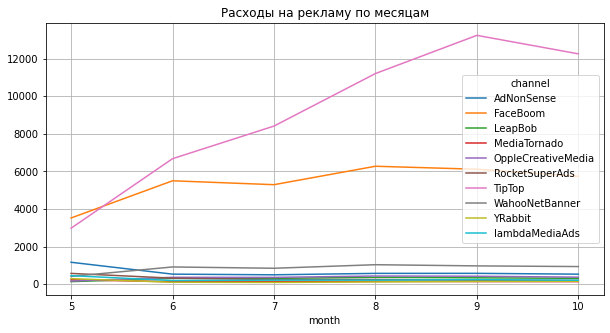

In [61]:
expenses['date']=pd.to_datetime(expenses['dt'])
expenses['week'] = expenses['date'].dt.isocalendar().week
expenses['month'] =pd.to_datetime(expenses['date']).dt.month
month=expenses.groupby(['month','channel']).agg({'costs':'sum'})
week=expenses.groupby(['week','channel']).agg({'costs':'sum'})
week.pivot_table(
    index='week', columns='channel', values='costs', aggfunc='sum'
).plot(grid=True, figsize=(10, 5))
plt.title('Расходы на рекламу по неделям')
plt.show()
month.pivot_table(
    index='month', columns='channel', values='costs', aggfunc='sum'
).plot(grid=True, figsize=(10, 5))
plt.title('Расходы на рекламу по месяцам')
plt.show()

#### Средняя стоимость привлечения одного пользователя

Посчитав сколько в среднем стоит привлечение одного пользователя мы получили следующие результаты: самые дорогие пользователи в TipTop,   2.799003. Следом идет FaceBoom, 1.113286. Самые дешевые пользователи приходят из LeapBob, 0.210172. Пользовватели organic являются бесплатными.

In [62]:
cac = (
     profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'}).sort_values(by='cac',ascending = False)
)
display(cac)

,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


#### Вывыд

И так, посмотрев на результаты, что у нас получились, можно сказать следующее. 

Больше всего компания тратит на рекламу в TipTop(54751.30) и эти траты росли с начала года. Так же в TipTop самые дорогие пользователи(2.799003). При этом TipTop занимает второе место среди платных каналов по количеству привлеченных пользователей(19794), а по доле платящих пользователей лишь четвертое(0.098).

На втором месте по затратности на рекламу FaceBoom(32445.60), траты так же постут с начала года. Стоимость пользователей FaceBoom  находится на втором месте(1.113286), но значительно нижу чем TipTop. При этом FaceBoom привлекает больше всего пользователей(29373)и по доле платящих пользователей находится на первом месте(0.123).

Стоит обратить внимание на канал lambdaMediaAds. Сейчас траты на этот канал одни из самых низких (1557.60). Привлекает lambdaMediaAds не так много пользователей(2236), но имеет хорошую долю платящих(0.108).

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [63]:
visits=visits.query('channel != "organic"')
expenses=expenses.query('channel != "organic"')

#### Расчет LTV и ROI

Глядя на графики можно сделать выводы что реклама не окупается и к концу второй недели ROI достигает отметки чуть выше 80%. При этом затраты на привлечение пользователей постоянно растут.При этом LTV достаточно стабилен, а значит дело не в ухудшении пользователей.

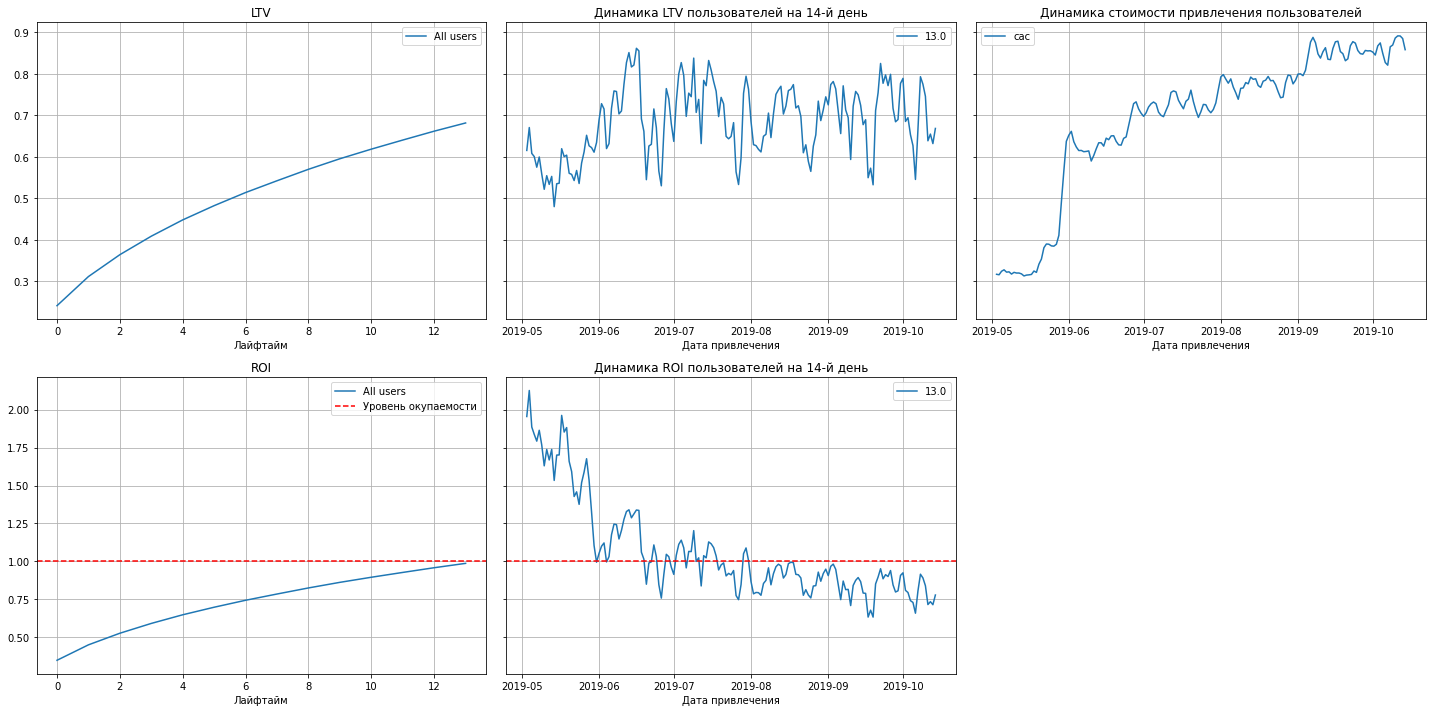

In [64]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date,analysis_horizon
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history,analysis_horizon,window=3)

#### Удержание и ее динамика

Мы видим что удержание платящих пользователей выше чем не платящих, что вполне закономерно.

In [65]:
retention_raw, retention, retention_history= get_retention(
    profiles,visits,observation_date,analysis_horizon
)
display(retention)
display(retention_history)

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
payer,,,,,,,,,,,,,,,
False,130578,0.606856,0.107185,0.052291,0.031452,0.020202,0.014926,0.011166,0.008684,0.006877,0.005728,0.004557,0.003852,0.003668,0.002864
True,8187,0.869916,0.331745,0.252351,0.204959,0.184194,0.165628,0.146330,0.136680,0.125687,0.119091,0.117503,0.106632,0.103945,0.092097


cohort_size       0.0       1.0       2.0       3.0  \
payer dt                                                                
False 2019-05-01          868  0.415899  0.085253  0.029954  0.026498   
      2019-05-02          728  0.412088  0.079670  0.042582  0.015110   
      2019-05-03          807  0.392813  0.069393  0.030979  0.029740   
      2019-05-04          960  0.434375  0.069792  0.044792  0.027083   
      2019-05-05          935  0.441711  0.084492  0.041711  0.029947   
...                       ...       ...       ...       ...       ...   
True  2019-10-10           57  0.947368  0.368421  0.315789  0.175439   
      2019-10-11           41  0.829268  0.439024  0.170732  0.219512   
      2019-10-12           55  0.872727  0.254545  0.272727  0.163636   
      2019-10-13           49  0.836735  0.244898  0.183673  0.224490   
      2019-10-14           47  0.872340  0.255319  0.255319  0.212766   

                       4.0       5.0       6.0       7.0       8.0       9.0  \
payer dt                                                                       
False 2019-05-01  0.008065  0.006912  0.011521  0.004608  0.004608  0.003456   
      2019-05-02  0.012363  0.006868  0.009615  0.004121  0.002747  0.002747   
      2019-05-03  0.011152  0.012392  0.013631  0.007435  0.003717  0.000000   
      2019-05-04  0.010417  0.009375  0.006250  0.003125  0.008333  0.004167   
      2019-05-05  0.014973  0.009626  0.006417  0.008556  0.005348  0.001070   
...                    ...       ...       ...       ...       ...       ...   
True  2019-10-10  0.263158  0.140351  0.140351  0.192982  0.105263  0.245614   
      2019-10-11  0.219512  0.073171  0.121951  0.097561  0.170732  0.146341   
      2019-10-12  0.127273  0.127273  0.090909  0.163636  0.072727  0.090909   
      2019-10-13  0.265306  0.204082  0.224490  0.040816  0.122449  0.122449   
      2019-10-14  0.148936  0.085106  0.127660  0.106383  0.106383  0.063830   

                      10.0      11.0      12.0      13.0  
payer dt                                                  
False 2019-05-01  0.000000  0.005760  0.001152  0.005760  
      2019-05-02  0.004121  0.004121  0.006868  0.001374  
      2019-05-03  0.002478  0.001239  0.002478  0.001239  
      2019-05-04  0.005208  0.007292  0.001042  0.003125  
      2019-05-05  0.003209  0.004278  0.005348  0.001070  
...                    ...       ...       ...       ...  
True  2019-10-10  0.140351  0.228070  0.122807  0.087719  
      2019-10-11  0.073171  0.097561  0.097561  0.121951  
      2019-10-12  0.072727  0.018182  0.054545  0.072727  
      2019-10-13  0.142857  0.102041  0.183673  0.061224  
      2019-10-14  0.063830  0.042553  0.106383  0.106383  

[334 rows x 15 columns]

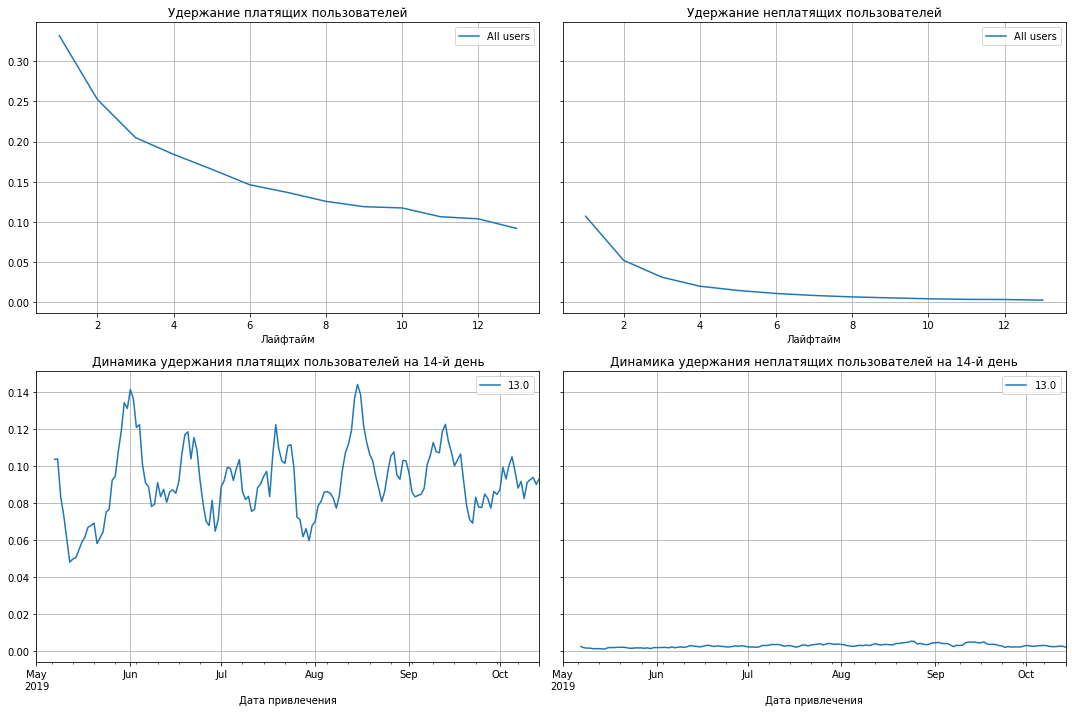

In [66]:
plot_retention(retention, retention_history,analysis_horizon)

##### Удержание по устройствам

Проанализируем удержание пользователей в зависимости от устройства пользователя. Ожидаемо Удержание платящих пользователей выше чем не платящих. Динамика удержания имеет стандартный вид.

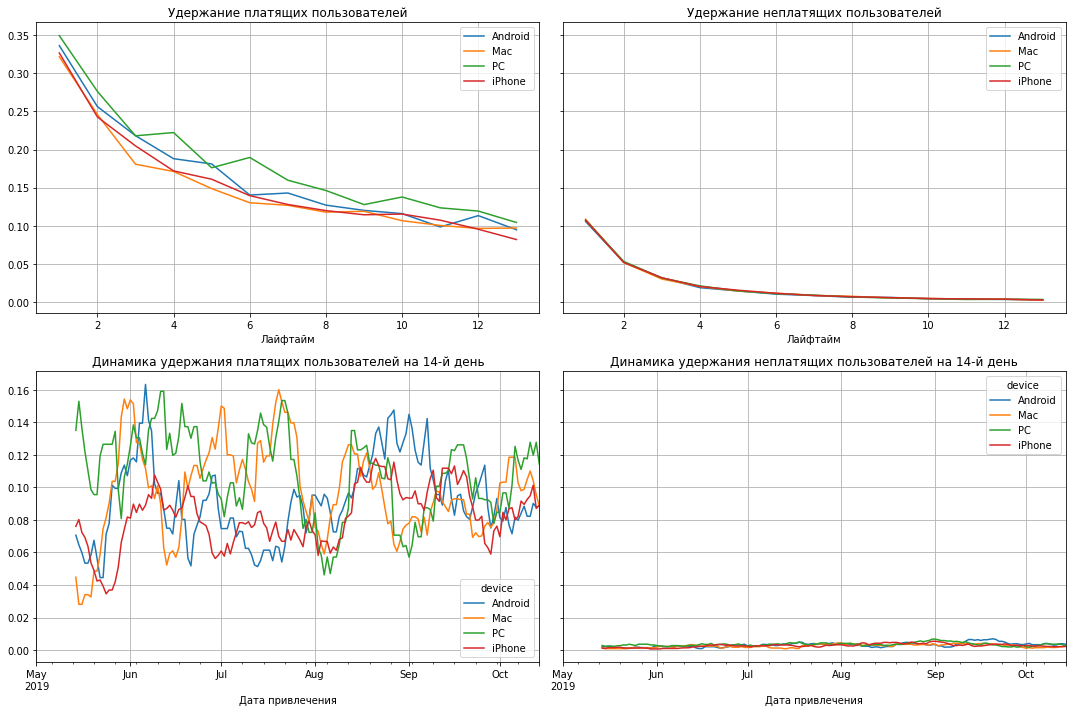

In [67]:
retention_raw, retention, retention_history= get_retention(
    profiles,visits,observation_date,analysis_horizon, dimensions=['device'],
)
plot_retention(retention, retention_history,analysis_horizon,window=14)

##### Удержание по каналам

Мы видим что удержание платящих пользователей для канала FaceBoom и AdNonSense находятся значительно ниже чем у остальных. При этом сильно выраженного лидера нет.

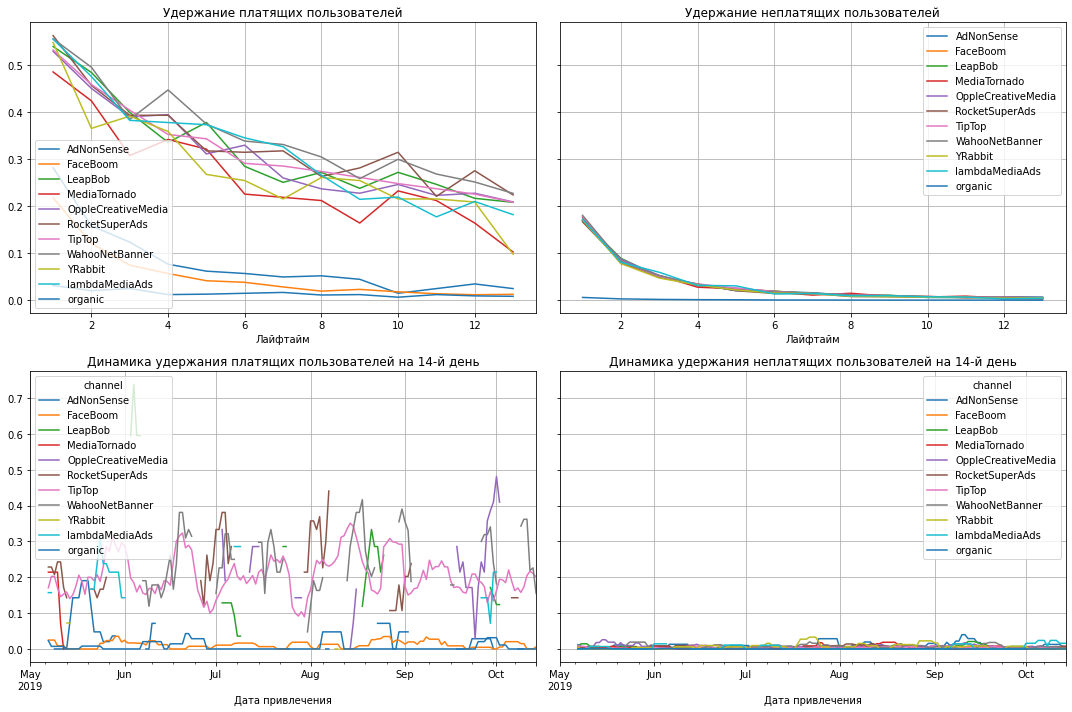

In [25]:
retention_raw, retention, retention_history= get_retention(
    profiles,visits,observation_date,analysis_horizon, dimensions=['channel'],
)
plot_retention(retention, retention_history,analysis_horizon,window=7)

##### Удержание по регионам

Удержание по регионам показало, что США сильно отстает по показателям. Удержание в этом регионе значительно ниже.

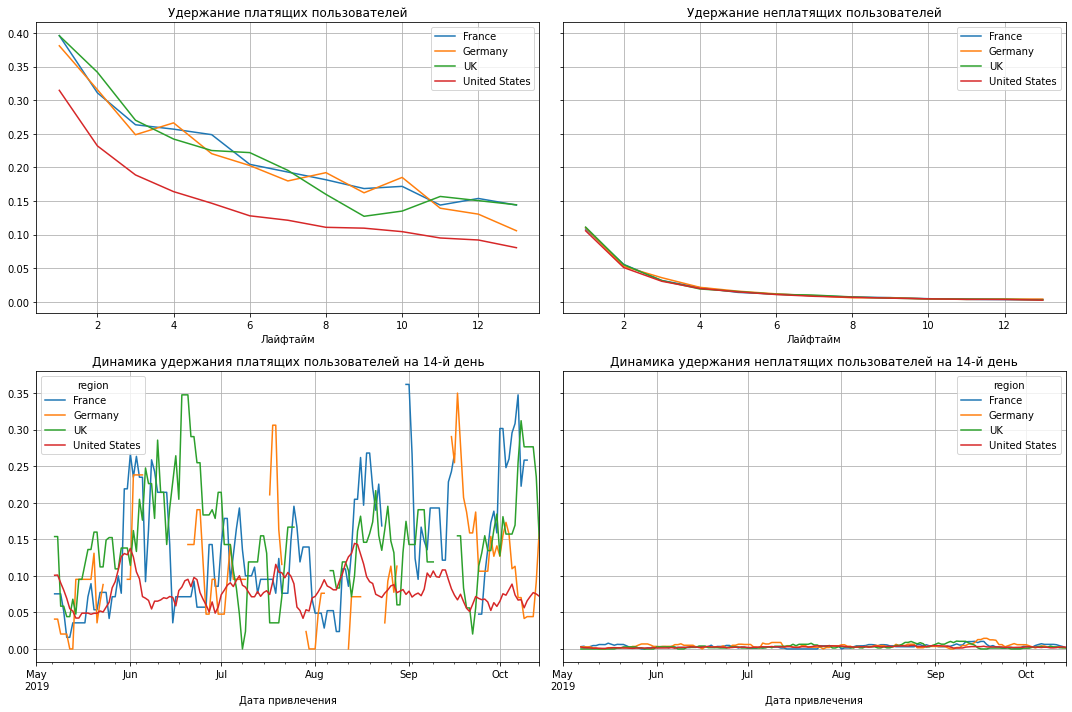

In [26]:
retention_raw, retention, retention_history= get_retention(
    profiles,visits,observation_date,analysis_horizon, dimensions=['region'],
)
plot_retention(retention, retention_history,analysis_horizon,window=7)

#### Конверсия и ее динамика

Конверсия идет по линии плавного увеличения, что говорит о том что конверсия постепенно растет.

Обратив внимание на динамику конверсии, мы видим что этот показатель значительно снижается к концу месяца.

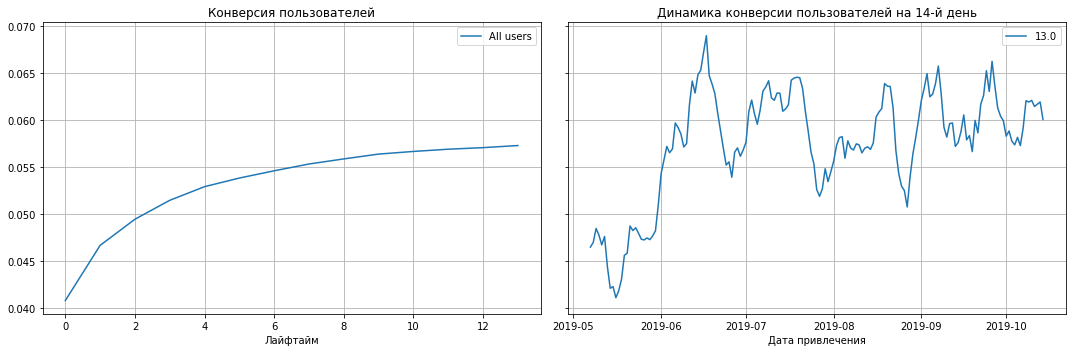

In [27]:
conversion_raw, conversion, conversion_history =get_conversion(
    profiles,
    orders,
    observation_date,
    analysis_horizon,
    ignore_horizon=False,
)
plot_conversion(conversion, conversion_history, analysis_horizon, window=7)

##### Конверсия по регионам

Конверсия в США имеет показатели гораздо лучше, чем в прочих регионах. Так же динамика конверсии в этом регионе более стабильна.

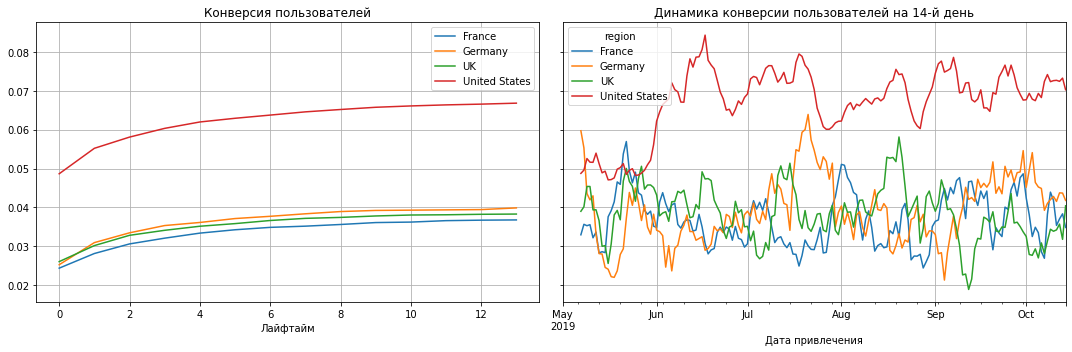

In [28]:
conversion_raw, conversion, conversion_history =get_conversion(
    profiles,
    orders,
    observation_date,
    analysis_horizon,
    ignore_horizon=False,
    dimensions=['region'],
)
plot_conversion(conversion, conversion_history, analysis_horizon, window=7)

##### Конверсия по каналам

Лучшую конверсию показывает FaceBoom. Но в принципе как коверсия так и динамика конверсии достаточно стабильны по всем каналам.

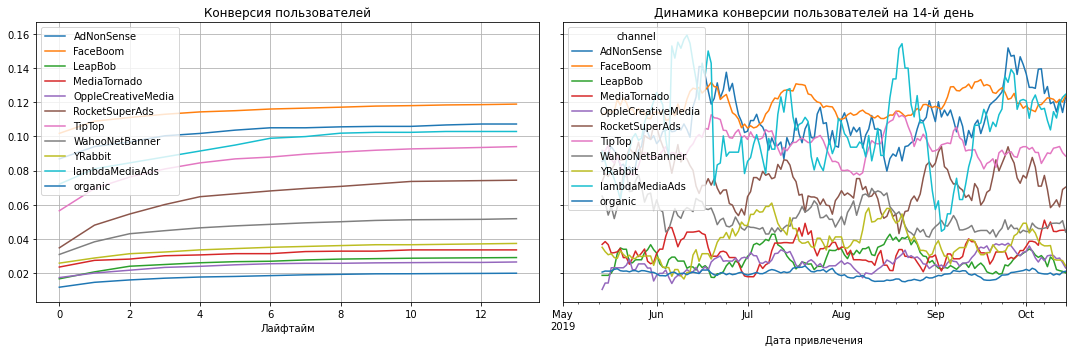

In [29]:
conversion_raw, conversion, conversion_history =get_conversion(
    profiles,
    orders,
    observation_date,
    analysis_horizon,
    ignore_horizon=False,
    dimensions=['channel'],
)
plot_conversion(conversion, conversion_history, analysis_horizon, window=14)

##### Конверсия по устройствам

Конверсия хуже всего у PC. Лучший показатель у Mac. Но сильно выраженного лидера тут нет. 

Что касается динамики конверсии, то у PC заметен значительный провал в конце июля.

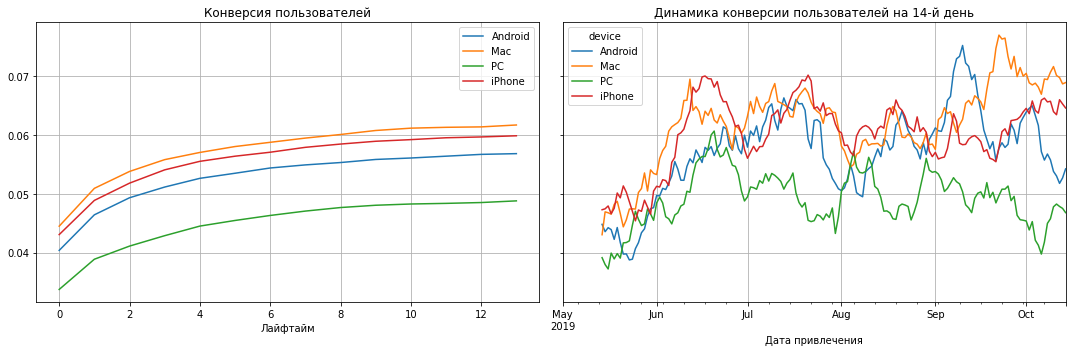

In [30]:
conversion_raw, conversion, conversion_history =get_conversion(
    profiles,
    orders,
    observation_date,
    analysis_horizon,
    ignore_horizon=False,
    dimensions=['device'],
)
plot_conversion(conversion, conversion_history, analysis_horizon, window=14)

#### Окупаемость рекламы с разбивкой по устройствам

Мы видим что реклама окупается только для пользователей с PC, окупаться данные пользователи начинают в начале второй недели. Почти достиг окупаемости на вторую неделю Android, но все же не окуптлись. Совсем не окупилась реклама для пользователей с iPhone и Mac. При этов LTV для всех устройств стабилен. CAC сильнее всего растет для пользователей iPhone и Mac, но есть рост и для других пользователей.

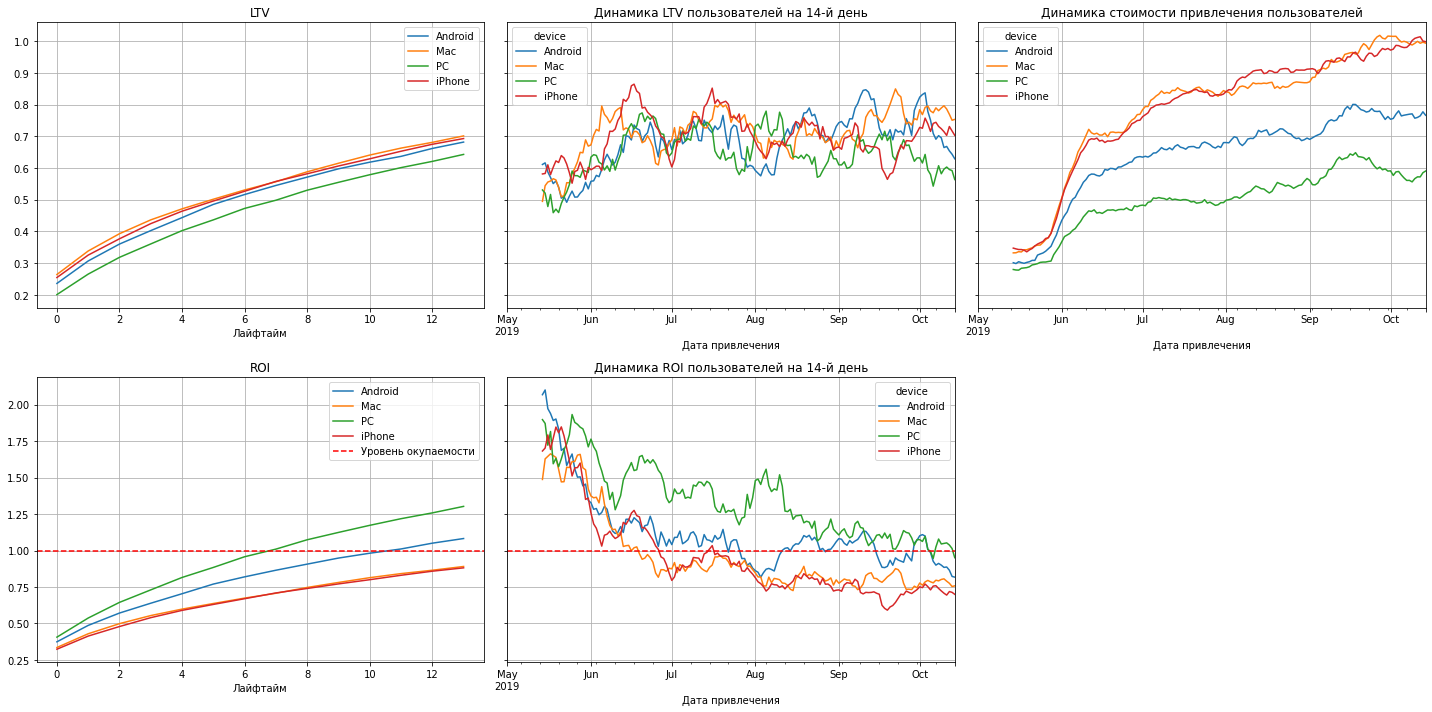

In [31]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date,analysis_horizon,dimensions=['device'],
    ignore_horizon=False,
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history,analysis_horizon,window=14)

#### Окупаемость рекламы с разбивкой по странам

Глядя на окупаемость рекламы по странам виден сильный дисбаланс. мы можем заметить что реклама окупается вБритании уже в начале первой недели. В Германии и Франции в середине первой недели. Все это очень хорошие показатели. Но реклама в США вообще не окупается, ROI в конце второй недели достигает лишь 80%. При этом затраты на привлечение пользователей в США сильно растут, тогда как в других странах они даже снижаются. При этом LTV в США чуть лучше чем в других странах.

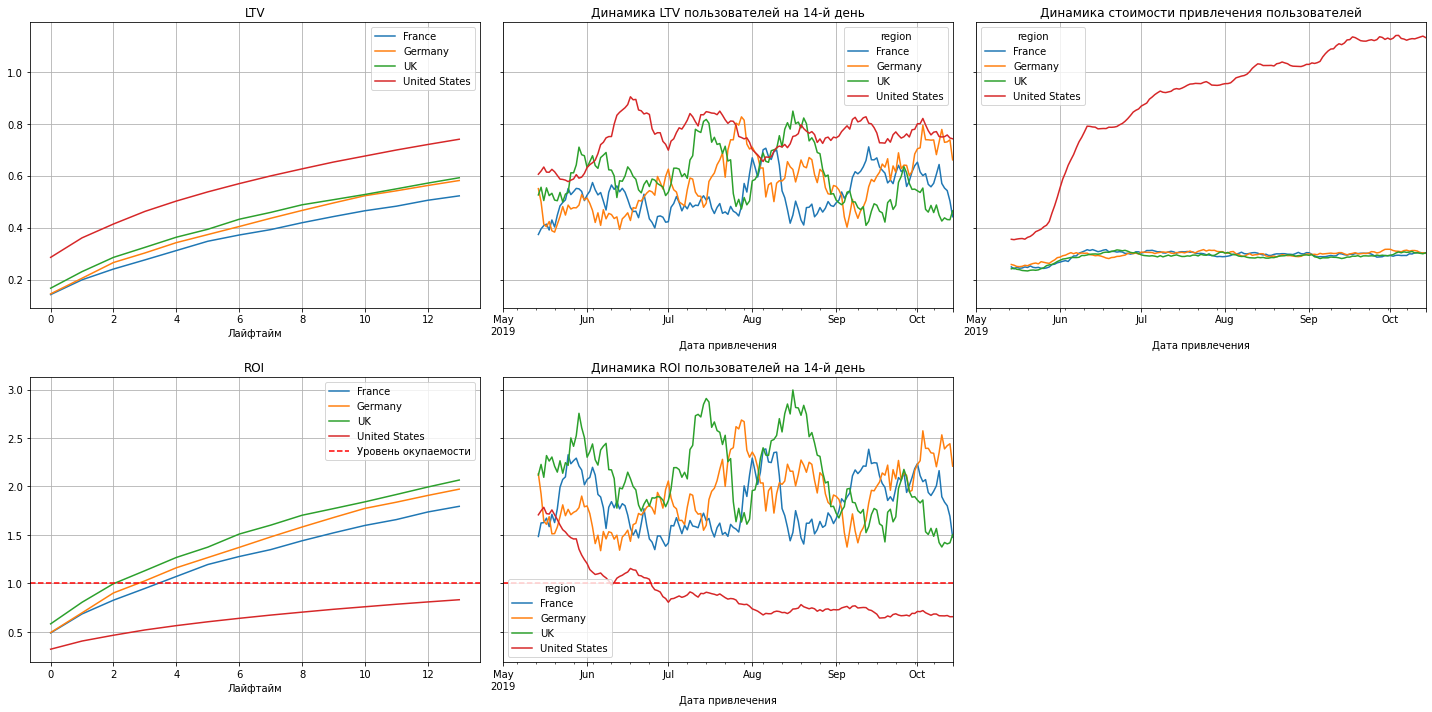

In [32]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date,analysis_horizon,dimensions=['region'],
    ignore_horizon=False,
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history,analysis_horizon,window=14)

#### Окупаемость рекламы с разбивкой по рекламным каналам

Теперь взглянем на окупаемость рекламы в зависимости от канала привлечения. Совсем не окупаются у нас только два канала, это TipTop и FaceBoom. С большим трудом окупается и канал AdNonSense. Зато хорошая окупаемость наблюдается у таких каналов как YRabbit и MediaTornado. Так же хорошо показали себя каналы RocketSuperAds, lambdaMediaAds, LeapBob.

Заметен сильный рост стоимости привлечения пользователей для TipTop. Для остальных каналов этот показатель достаточно стабилен. При этом LTV пользователя наилучший у lambdaMediaAds. Но вообще так же стабилен для всех каналов.

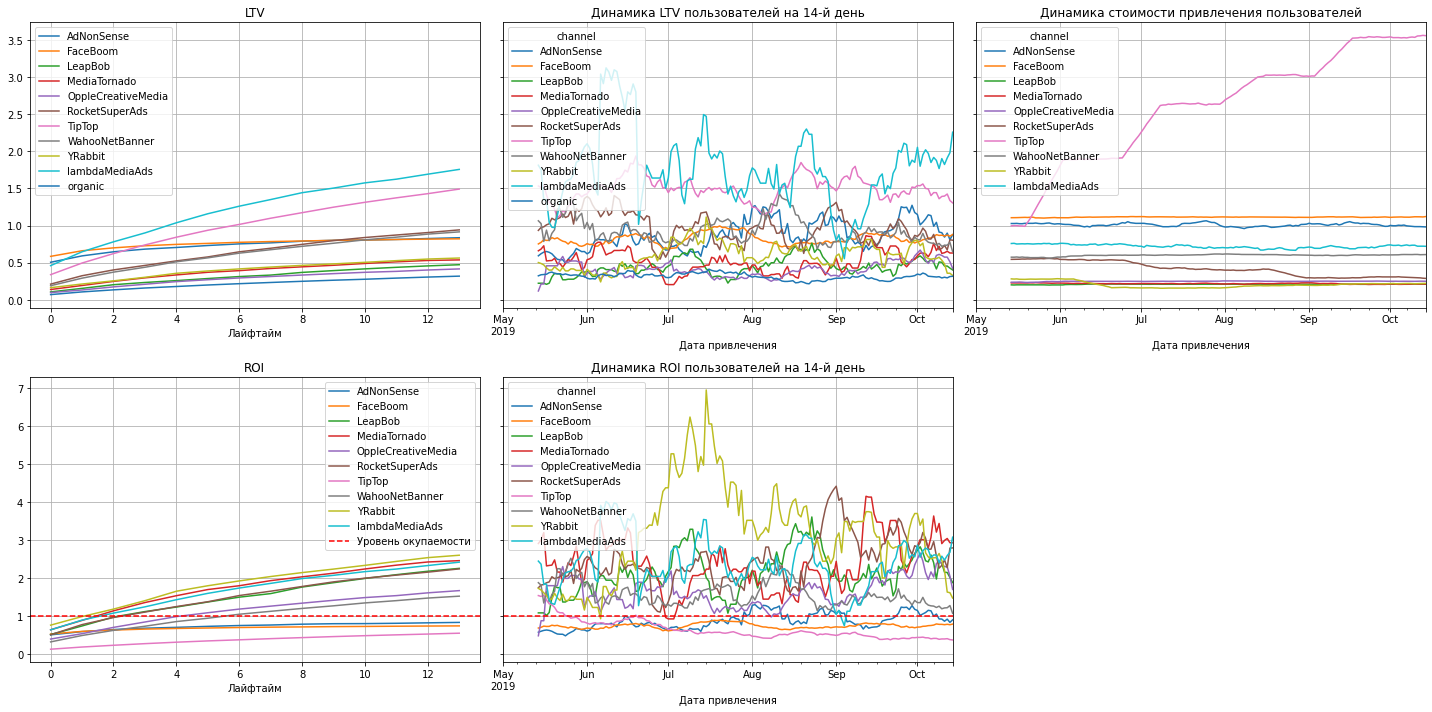

In [33]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date,analysis_horizon,dimensions=['channel'],
    ignore_horizon=False,
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history,analysis_horizon,window=14)

### Подробное изучение региона США

#### Пользователи по устройству

Больше всепго пользователей в США заходят с iPhone, при этом доля платящих пользователей тут меньше всего.

In [34]:
profiles = get_profiles(visits, orders,expenses)
profiles_us=profiles.query('region == "United States"')
profiles_device_us=profiles_us.groupby(['device']).agg({'user_id':'nunique'})
profiles_device_payer_us=profiles_us.groupby('device').agg({'payer':'mean'}).sort_values(by='payer',ascending = False)
profiles_device_payer_us=profiles_device_payer_us.merge(profiles_device_us,on='device')
display(profiles_device_payer_us)

,payer,user_id
device,,
Android,0.108472,12630
Mac,0.100032,15665
PC,0.099832,6531
iPhone,0.099228,27996


#### Пользователи по каналам

Мы видим что преобладающее количество пользователей в США приходит из каналов FaceBoom и TipTop. Эти же два канала имеют самую высокую долю платящих пользователей.

In [35]:
profiles_channel_us=profiles_us.groupby(['channel']).agg({'user_id':'nunique'})
profiles_channel_payer_us=profiles_us.groupby('channel').agg({'payer':'mean'}).sort_values(by='payer',ascending = False)
profiles_channel_payer_us=profiles_channel_payer_us.merge(profiles_channel_us,on='channel')
display(profiles_channel_payer_us)

,payer,user_id
channel,,
FaceBoom,0.122936,29373
TipTop,0.098009,19794
RocketSuperAds,0.087624,4622
YRabbit,0.046150,4507
MediaTornado,0.044852,4526


#### Траты на рекламу по каналам в США

Мы види, что в США основные траты на рекламы приходятся всего на два канала, это TipTop и FaceBoom. 

In [36]:
display(profiles_us.groupby('channel').agg({'acquisition_cost':'sum'}).sort_values(by='acquisition_cost',ascending = False))

,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
RocketSuperAds,1833.00
MediaTornado,954.48
YRabbit,944.22


#### Окупаемость рекламы по устройствам

Мы видим что затраты на рекламу планомерно растут для всех устройств. При этом реклама ни для одного для устройств не окупается. LTV пользователей стабилен.

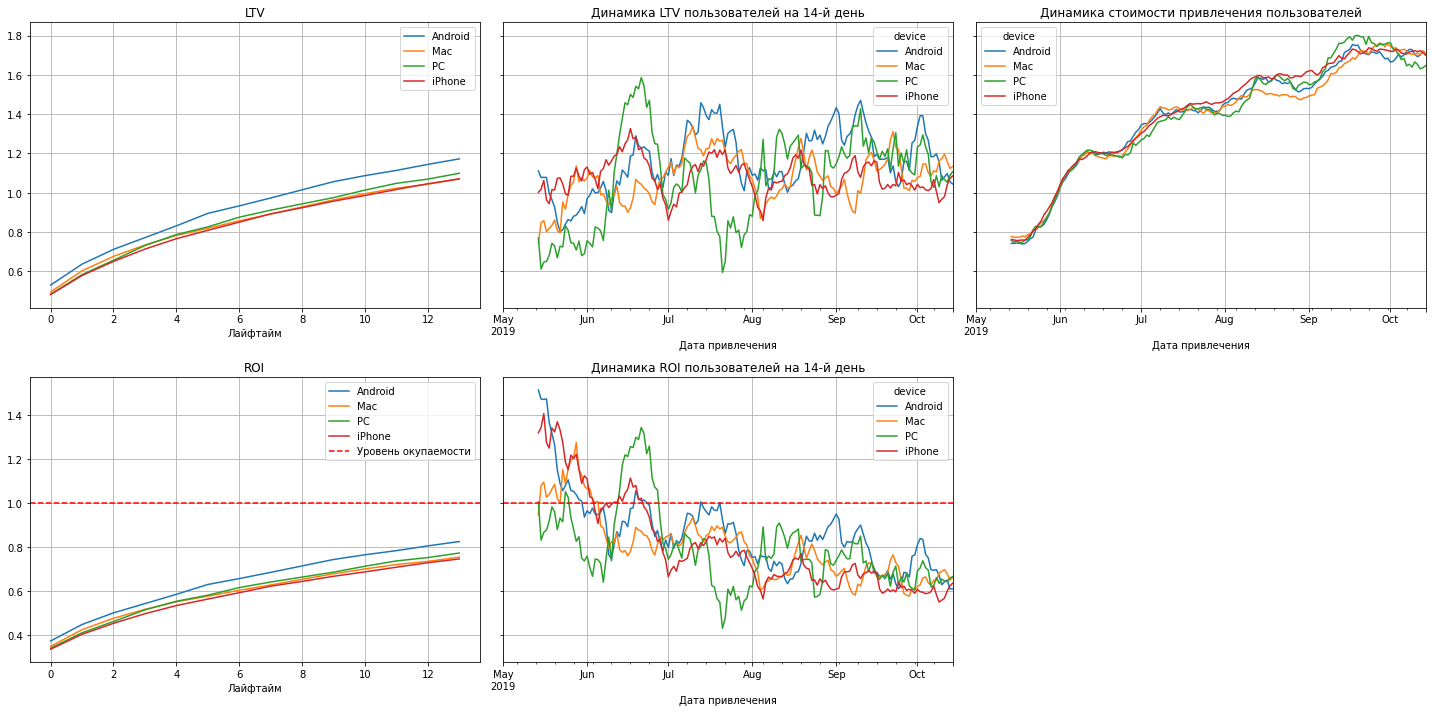

In [37]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_us, orders, observation_date,analysis_horizon,dimensions=['device'],
    ignore_horizon=False,
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history,analysis_horizon,window=14)

#### Окупаемость рекламы по каналам

Мы видим что реклама не окупается только для двух каналов, TipTop и FaceBoom. При этом большинство пользователей приходят именно из этих каналов. Так же мы видим значительный рост затрат на рекламу в TipTop. FaceBoom имеет стабильный расход. А вот все остальные каналы незначительно снижают затраты. LTV пользователей стабилет.

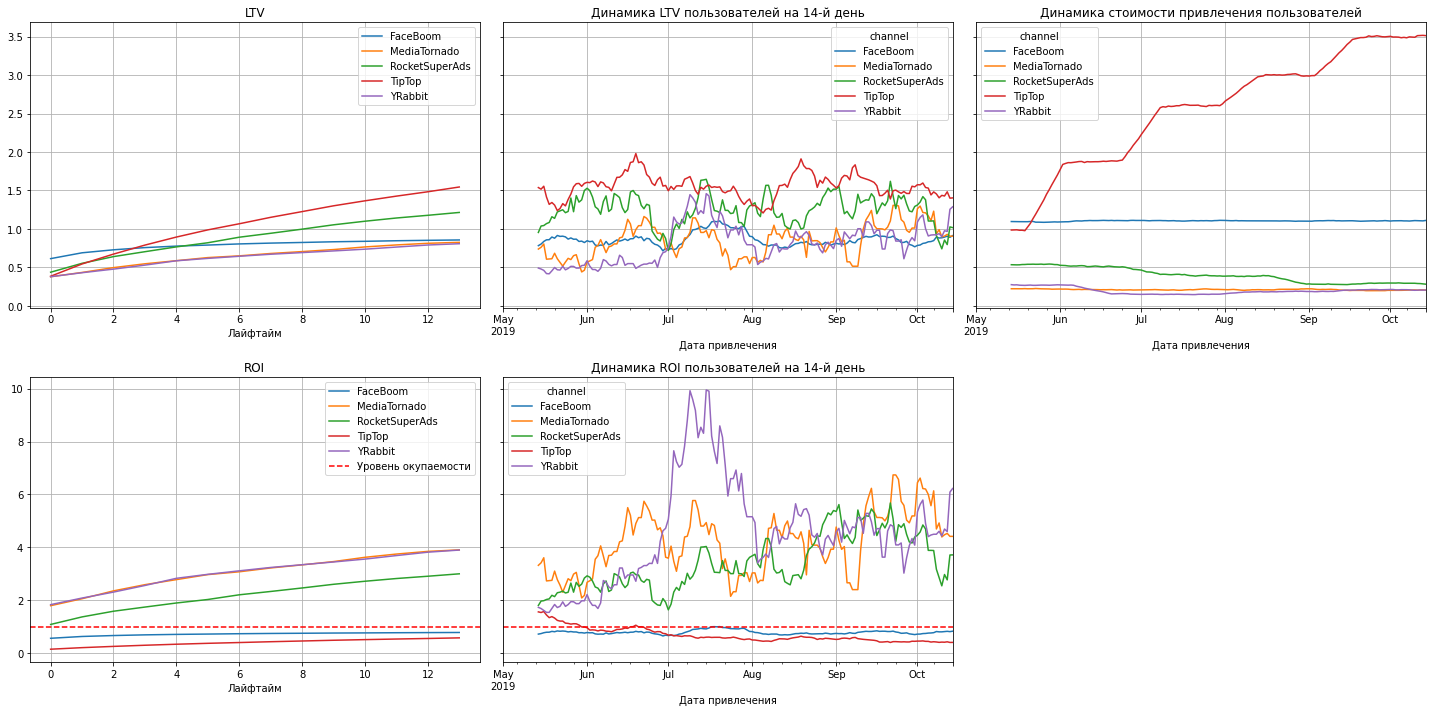

In [38]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_us, orders, observation_date,analysis_horizon,dimensions=['channel'],
    ignore_horizon=False,
)
plot_ltv_roi(ltv, ltv_history, roi, roi_history,analysis_horizon,window=14)

#### Удержание по каналам

Мы видим что удержание платящих пользователей сильно проседает у FaceBoom. То же самое можно увидить в динамике.

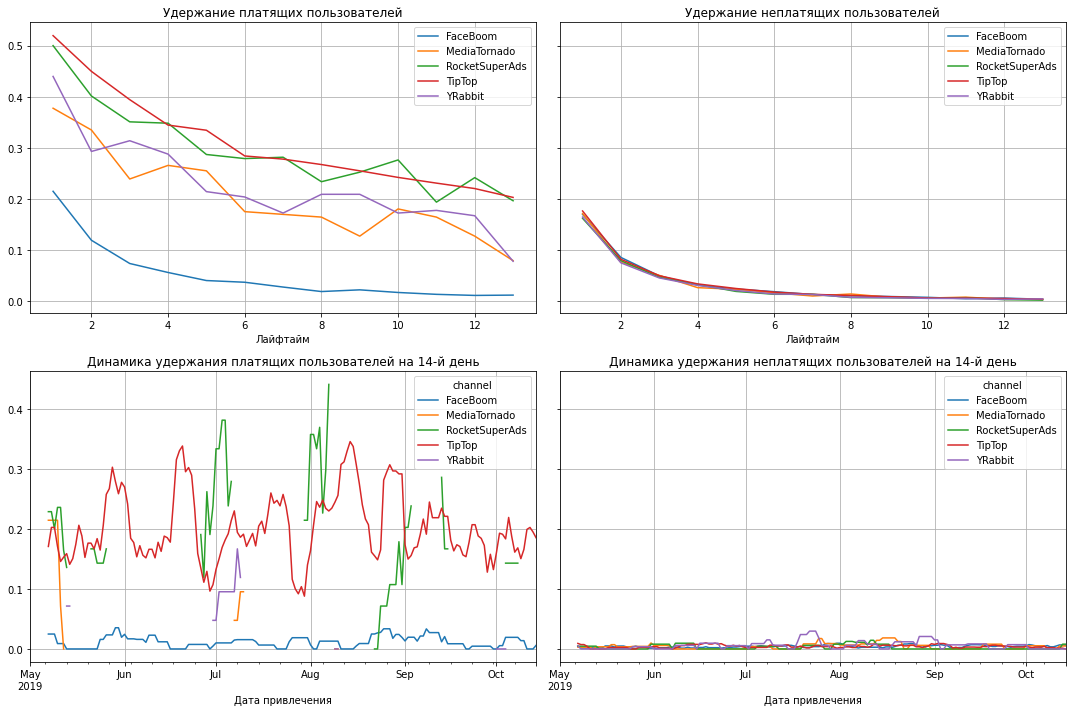

In [39]:
retention_raw, retention, retention_history= get_retention(
    profiles_us,visits,observation_date,analysis_horizon, dimensions=['channel'],
)
plot_retention(retention, retention_history,analysis_horizon,window=7)

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

#### ВЫВОД

Мы выяснили что общая реклама для компании является убыточной. Но разобравшись подробнее можно выделить несколько возможных причин:

1. Мы заметили что окупаемость рекламы сильно отличается в зависимости от региона. Реклама хорошо окупается в таких странах как Германия, Британия и Франция. И напротив совсем не окупается в США. При этом компания стоимость привлечения пользователей из США постоянно растет и значительно выше чем в других странах. LTV пользователей из разных стран при этом стабилен.

2. Рекламные каналы. Стоимость привлечения пользователей из TipTop постоянно растет и обходится компании значительно выше чем привлечение пользователей из других каналов. Стоимость пользователей из других каналов при этом стабильна.При этом реклама TipTop совсем не окупается, так же как и реклама FaceBoom. Очень плохую окупаемость имеет и канал AdNonSense. Хорошая окупаемость наблюдается у таких каналов как YRabbit и MediaTornado. Так же хорошо показали себя каналы RocketSuperAds, lambdaMediaAds, LeapBob. LTV пользователя наилучший у lambdaMediaAds. Но вообще так же стабилен для всех каналов.

3. Устройства пользователей. Мы видим что реклама окупается только для пользователей с PC, окупаться данные пользователи начинают в начале второй недели. Почти достиг окупаемости на вторую неделю Android, но все же не окупились. Совсем не окупилась реклама для пользователей с iPhone и Mac. При этов LTV для всех устройств стабилен. CAC сильнее всего растет для пользователей iPhone и Mac, но есть рост и для других пользователей.


Рекомендации:

1. Стоит более подробна разобраться по какой причине не окупается реклама в США, ведь в этом регионе достаточно хорошая доля платящих пользователей. Проведя более подробное исследование, мы заметили что основные пользователи из США приходят из таких каналов как TipTop и FaceBoom. Но стоимость привлечения пользователей в этих каналах дорогая. К тому же у FaceBoom для этого региона очень низкое удержание платящих пользователей. Возможно в этом и причина неокупаемости рекламы в данном регионе. Возможно стоит попробовать развивать иные рекламные каналы в данном регионе или обратить свое внимание на те регионы где мы имеем хорошую окупаемость.
2. Прежде всего стоит проверить такой канал как TipTop. Реклама в этом канале совсем не окупается, при этом Стоимость привлечения пользователей постоянно растет. Возможно стоит обратить свое внимание на такие каналы как lambdaMediaAds,RocketSuperAds. Они имеют хорошую окупаемость, стабильный LTV и CAC.И при этом у них еще и хорошая доля платящих пользователей.
3. Мы видим что реклама окупается только для PC. При этом у Mac и iPhone для платящих пользователей выше всего. Возможно стоит разобраться все ли у нас хорошо с оплатой через приложения для данных устройств. Есть вероятность что там возникают какие-то проблемы. К тому же изучая устройства для пользователей из США, мы видим что больше всего пользователей заходят с iPhone, но доля платящих пользователей самая низкая. Это еще один повод подробнее проверить все ли хорошо с оплатой для пользователей приложения на данном устройстве.